In [278]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import numpy as np
import matplotlib.pyplot as plt

In [279]:
# Consultando dados Fifa 21
fonte = "C://Users//martins//Documents//Dataframes//Fifa 21//fifa21.csv"

# Leitura do arquivo e criando DataFrame
df = pd.read_csv(fonte, sep=';')

# Visualizando DataFrame
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [280]:
df.shape

(17981, 9)

In [281]:
df.columns = ["ID_JOGADOR", "NOME", "NACIONALIDADE", "POSICAO", "OVERALL", "IDADE", "HITS", "POTENCIAL", "CLUBE"]

In [282]:
df.head()

,ID_JOGADOR,NOME,NACIONALIDADE,POSICAO,OVERALL,IDADE,HITS,POTENCIAL,CLUBE
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [283]:
# Verificando dados nulos
df.isnull().sum()

ID_JOGADOR       0
NOME             0
NACIONALIDADE    0
POSICAO          0
OVERALL          0
IDADE            0
HITS             0
POTENCIAL        0
CLUBE            0
dtype: int64

In [284]:
# Verificando tipo de dados das colunas
df.dtypes

ID_JOGADOR        int64
NOME             object
NACIONALIDADE    object
POSICAO          object
OVERALL           int64
IDADE             int64
HITS              int64
POTENCIAL         int64
CLUBE            object
dtype: object

In [286]:
# criando um DataFrame para separar o campo "POSICAO"
trata_posicao = lambda x: pd.Series([i for i in x.split('|')])
pos = df['POSICAO'].apply(trata_posicao)

# renomeando a coluna de acordo com seu indice
df['POSICAO_01']=pos[0]
df['POSICAO_02']=pos[1]
df['POSICAO_03']=pos[2]
df['POSICAO_04']=pos[3]
df['POSICAO_05']=pos[4]

df.head(5)

,ID_JOGADOR,NOME,NACIONALIDADE,POSICAO,OVERALL,IDADE,HITS,POTENCIAL,CLUBE,POSICAO_01,POSICAO_02,POSICAO_03,POSICAO_04,POSICAO_05
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona,ST,CF,RW,NaN,NaN
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus,ST,LW,NaN,NaN,NaN
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain,CAM,LW,NaN,NaN,NaN
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool,CB,NaN,NaN,NaN,NaN
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid,GK,NaN,NaN,NaN,NaN


In [463]:
df.drop('POSICAO', axis=1)

,ID_JOGADOR,NOME,NACIONALIDADE,OVERALL,IDADE,HITS,POTENCIAL,CLUBE,POSICAO_01,POSICAO_02,POSICAO_03,POSICAO_04,POSICAO_05
0,158023,Lionel Messi,Argentina,94,33,299,94,FC Barcelona,ST,CF,RW,NaN,NaN
1,20801,Cristiano Ronaldo,Portugal,93,35,276,93,Juventus,ST,LW,NaN,NaN,NaN
2,190871,Neymar Jr,Brazil,92,28,186,92,Paris Saint-Germain,CAM,LW,NaN,NaN,NaN
3,203376,Virgil van Dijk,Netherlands,91,29,127,92,Liverpool,CB,NaN,NaN,NaN,NaN
4,200389,Jan Oblak,Slovenia,91,27,47,93,Atlético Madrid,GK,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,56,21,0,64,Sociedad Deportiva Aucas,ST,NaN,NaN,NaN,NaN
17977,256088,Michael Carcelén,Ecuador,56,23,0,64,Club Deportivo El Nacional,CM,NaN,NaN,NaN,NaN
17978,256074,Davide Luzi,Venezuela,56,18,1,68,Zamora Fútbol Club,ST,NaN,NaN,NaN,NaN
17979,256073,Sergio Sulbarán,Venezuela,56,22,0,62,Zamora Fútbol Club,RW,NaN,NaN,NaN,NaN


In [288]:
# Quantidade total de nacionalidades retirando duplicatas
df["NACIONALIDADE"].nunique()

162

In [289]:
# Quantidade total de jogadores por nacionalidade
df["NACIONALIDADE"].value_counts()

England      1496
Germany      1138
Spain        1055
Argentina     970
France        948
             ... 
Vietnam         1
Macau           1
Guatemala       1
Oman            1
Barbados        1
Name: NACIONALIDADE, Length: 162, dtype: int64

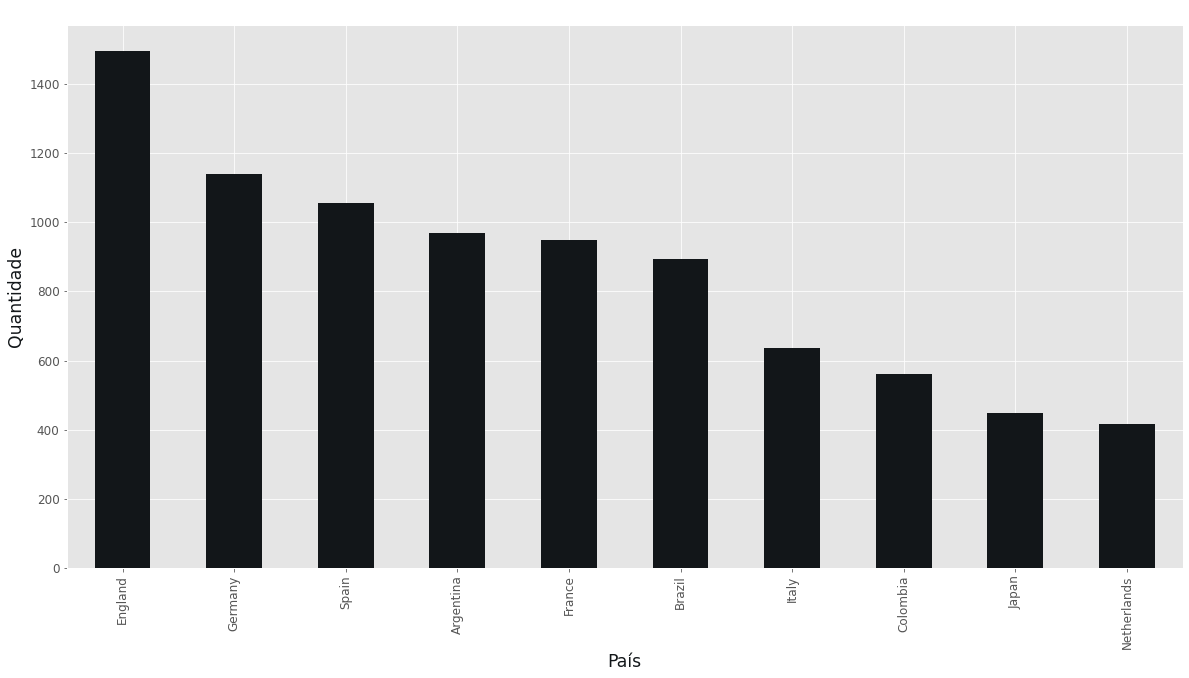

In [487]:
plt.style.use('ggplot') #top 50 nations that the players represent in FIFA 2021
plt.figure(figsize = (20,10))
df['NACIONALIDADE'].value_counts().head(10).plot.bar(color = '#121619', fontsize = 'large')
plt.title('Jogadores x País')
plt.xlabel('País', fontsize = 'xx-large', color = '#121619')
plt.ylabel('Quantidade', fontsize = 'xx-large', color = '#121619')
plt.show()

In [290]:
# Quantidade total de jogadores por nacionalidade (2ª opcao ordem alfabetica)
agrupado_nacionalidade = df.groupby(['NACIONALIDADE']).size()
agrupado_nacionalidade

NACIONALIDADE
Afghanistan            2
Algeria               53
Angola                16
Antigua & Barbuda      5
Argentina            970
                    ... 
Vietnam                1
Wales                114
Zambia                10
Zimbabwe              13
lbania                40
Length: 162, dtype: int64

In [ ]:
# idade

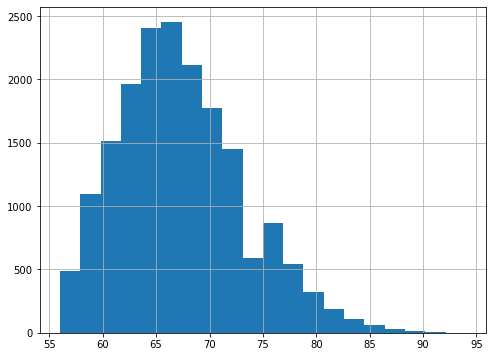

In [464]:
df["OVERALL"].hist(bins = 20, figsize=(8,6))

In [465]:
# Quantidade de posições diferentes incluindo jogadores polivalentes (combinação)
df["POSICAO"].nunique()

232

In [488]:
# Quantidade de jogadores por posição
df["POSICAO"].value_counts()

CB                  2296
GK                  1884
ST                  1757
CDM|CM              1546
LB                   695
                    ... 
RM|CM|CF               1
RWB|LWB|LM|RW|LW       1
LB|CAM                 1
LB|RW                  1
CDM|RM|CAM             1
Name: POSICAO, Length: 232, dtype: int64

In [293]:
df["POSICAO_01"].nunique() # quantidade de posições distintas no jogo

15

In [294]:
# Quantidade de jogadores por posição 01 (principal) distinta
df["POSICAO_01"].value_counts()

ST     3216
CB     2777
CDM    2176
GK     1885
RB     1805
LB     1665
RM     1443
CM     1145
LM      743
CAM     412
RWB     321
RW      222
LW       76
LWB      57
CF       38
Name: POSICAO_01, dtype: int64

In [296]:
# Melhores jogadores do jogo
df[["POSICAO_01", "POSICAO_02", "NOME", "OVERALL", "CLUBE"]].head(10)

,POSICAO_01,POSICAO_02,NOME,OVERALL,CLUBE
0,ST,CF,Lionel Messi,94,FC Barcelona
1,ST,LW,Cristiano Ronaldo,93,Juventus
2,CAM,LW,Neymar Jr,92,Paris Saint-Germain
3,CB,NaN,Virgil van Dijk,91,Liverpool
4,GK,NaN,Jan Oblak,91,Atlético Madrid
5,CM,CAM,Kevin De Bruyne,91,Manchester City
6,ST,NaN,Robert Lewandowski,91,FC Bayern München
7,ST,LW,Eden Hazard,91,Real Madrid
8,GK,NaN,Alisson,90,Liverpool
9,ST,RW,Mohamed Salah,90,Liverpool


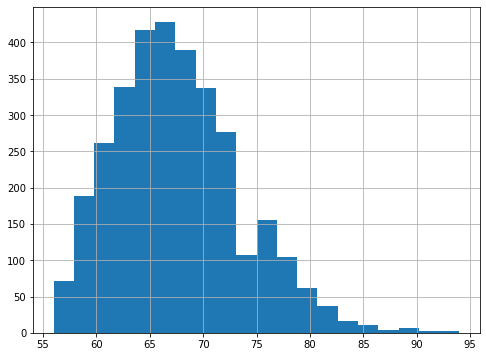

In [466]:
# Visualizando Centro Avante (Striker)
atacantes = df.loc[(df['POSICAO_01'] == 'ST')
       | (df['POSICAO_02'] == 'ST')
       | (df['POSICAO_03'] == 'ST')
       | (df['POSICAO_04'] == 'ST') 
       | (df['POSICAO_05'] == 'ST')]

atacantes["OVERALL"].hist(bins = 20, figsize=(8,6))

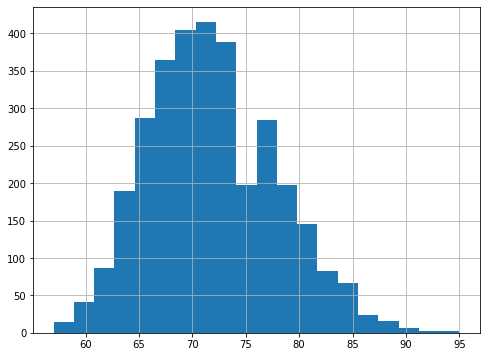

In [299]:
atacantes["POTENCIAL"].hist(bins = 20, figsize=(8,6))

In [338]:
# Função para OVERALL
def player_top_overall(posicao, qtd = 10):
    pos = df.loc[(df['POSICAO_01'] == posicao) 
                       | (df['POSICAO_02'] == posicao)
                       | (df['POSICAO_03'] == posicao)
                       | (df['POSICAO_04'] == posicao) 
                       | (df['POSICAO_05'] == posicao)]
    return pos.nlargest(qtd, "OVERALL")[["POSICAO_01", "NOME", "OVERALL", "POTENCIAL", "CLUBE"]]

def player_bottom_overall(posicao, qtd = 10):
    pos = df.loc[(df['POSICAO_01'] == posicao) 
                       | (df['POSICAO_02'] == posicao)
                       | (df['POSICAO_03'] == posicao)
                       | (df['POSICAO_04'] == posicao) 
                       | (df['POSICAO_05'] == posicao)]
    return pos.nsmallest(qtd, "OVERALL")[["POSICAO_01", "NOME", "OVERALL", "POTENCIAL", "CLUBE"]]

# Função para POTENCIAL
def player_top_potencial(posicao, qtd = 10):
    pos = df.loc[(df['POSICAO_01'] == posicao) 
                       | (df['POSICAO_02'] == posicao)
                       | (df['POSICAO_03'] == posicao)
                       | (df['POSICAO_04'] == posicao) 
                       | (df['POSICAO_05'] == posicao)]
    return pos.nlargest(qtd, "POTENCIAL")[["POSICAO_01", "NOME", "OVERALL", "POTENCIAL", "CLUBE"]]

def player_bottom_potencial(posicao, qtd = 10):
    pos = df.loc[(df['POSICAO_01'] == posicao) 
                       | (df['POSICAO_02'] == posicao)
                       | (df['POSICAO_03'] == posicao)
                       | (df['POSICAO_04'] == posicao) 
                       | (df['POSICAO_05'] == posicao)]
    return pos.nsmallest(qtd, "POTENCIAL")[["POSICAO_01", "NOME", "OVERALL", "POTENCIAL", "CLUBE"]]

# Função para jogador
def pesquisa_jogador(nome_jogador):
    return df.loc[(df['NOME'] == nome_jogador)]


def pesquisa_plantel(nome_clube):
    return df.loc[(df['CLUBE'] == nome_clube)]

In [489]:
# Melhores jogadores (posicao por parametro, qtd)
player_top_overall("ST")

,POSICAO_01,NOME,OVERALL,POTENCIAL,CLUBE
0,ST,Lionel Messi,94,94,FC Barcelona
1,ST,Cristiano Ronaldo,93,93,Juventus
6,ST,Robert Lewandowski,91,91,FC Bayern München
7,ST,Eden Hazard,91,91,Real Madrid
9,ST,Mohamed Salah,90,90,Liverpool
12,ST,Sergio Agüero,90,90,Manchester City
13,ST,Kylian Mbappé,89,95,Paris Saint-Germain
15,ST,Harry Kane,89,91,Tottenham Hotspur
16,ST,Antoine Griezmann,89,89,FC Barcelona
19,ST,Luis Suárez,89,89,FC Barcelona


In [490]:
# Piores jogadores (posicao por parametro, qtd)
player_bottom_overall("ST")

,POSICAO_01,NOME,OVERALL,POTENCIAL,CLUBE
17969,ST,Gautier Ott,56,75,AS Nancy Lorraine
17976,ST,Jaime Ortíz,56,64,Sociedad Deportiva Aucas
17978,ST,Davide Luzi,56,68,Zamora Fútbol Club
17494,ST,Luciano Arriagada,57,73,Colo-Colo
17498,ST,Jamie Gullan,57,70,Hibernian
17506,ST,Martínez,57,71,Real Sociedad
17513,ST,Patrick Koffi,57,73,Paris FC
17519,ST,Michel Ulrich,57,67,FC Hansa Rostock
17520,ST,Estiven Pérez,57,68,Guaraní (Paraguay)
17530,ST,Maximiliano Quinteros,57,57,CD Universidad de Concepción


In [493]:
# Melhores potenciais (posicao por parametro, qtd)
player_top_potencial("ST")

,POSICAO_01,NOME,OVERALL,POTENCIAL,CLUBE
13,ST,Kylian Mbappé,89,95,Paris Saint-Germain
0,ST,Lionel Messi,94,94,FC Barcelona
1,ST,Cristiano Ronaldo,93,93,Juventus
418,ST,João Félix,80,93,Atlético Madrid
6,ST,Robert Lewandowski,91,91,FC Bayern München
7,ST,Eden Hazard,91,91,Real Madrid
15,ST,Harry Kane,89,91,Tottenham Hotspur
117,ST,Lautaro Martínez,84,91,Inter
9,ST,Mohamed Salah,90,90,Liverpool
12,ST,Sergio Agüero,90,90,Manchester City


In [492]:
# Piores potenciais (posicao por parametro, qtd)
player_bottom_potencial("ST")

,POSICAO_01,NOME,OVERALL,POTENCIAL,CLUBE
17530,ST,Maximiliano Quinteros,57,57,CD Universidad de Concepción
17589,ST,Carlos Orejuela,57,57,CS Emelec
17601,ST,Enzo Díaz,57,57,Club Atlético Tigre
17686,ST,Jesse Weißenfels,57,57,Sportverein Waldhof Mannheim 07 e.V.
17945,ST,Marc Mas,57,57,GIF Sundsvall
17948,ST,Jacob Blyth,57,57,Macclesfield Town
17956,ST,Luka Mijaljevic,57,57,AFC Eskilstuna
17055,ST,Federico Ortíz,58,58,Club River Plate Asunción
17102,ST,Mohammed Al Sahli,58,58,Al Raed
17403,ST,Song Wenjie,58,58,Shandong Luneng TaiShan FC


In [518]:
def pesquisa_plantel(club): 
    return df[df['CLUBE'] == club][['NOME','OVERALL','POTENCIAL','POSICAO','HITS','IDADE']]

In [521]:
pesquisa_plantel('Nome')

,NOME,OVERALL,POTENCIAL,POSICAO,HITS,IDADE


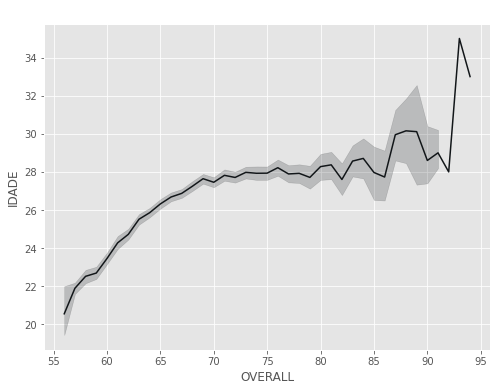

In [523]:
plt.figure(figsize=(8,6))
srn.lineplot(df['OVERALL'], df['IDADE'], color = '#121619')
plt.title('Overall x Idade', fontsize = 14)
plt.show()